**Ploting of bibliographic graph(or its subgraph) for a hetrogenous network and visualize it**

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
# Load the Medical Tourism DataSet.csv dataset using pandas
df = pd.read_csv('/content/Medical Tourism DataSet.csv')
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,Connell J.,56227359000;,"Medical tourism: Sea, sun, sand and ... surgery",2006,Tourism Management,27,6,NaN,1093,1100,...,NaN,NaN,NaN,English,Tour. Manage.,Article,Final,NaN,Scopus,2-s2.0-33746326777
1,"Bookman M.Z., Bookman K.R.",7005651465;57193532861;,Medical tourism in developing countries,2007,Medical Tourism in Developing Countries,NaN,NaN,NaN,1,245,...,9780230605657; 9780230600058,NaN,NaN,English,Med. Tourism in Developing Ctries.,Book,Final,NaN,Scopus,2-s2.0-85014664334
2,Connell J.,56227359000;,Contemporary medical tourism: Conceptualisatio...,2013,Tourism Management,34,NaN,NaN,1,13,...,NaN,NaN,NaN,English,Tour. Manage.,Review,Final,NaN,Scopus,2-s2.0-84867139510
3,"Mueller H., Kaufmann E.L.",56127515200;7005400051;,Wellness tourism: Market analysis of a special...,2001,Journal of Vacation Marketing,7,1,NaN,5,17,...,NaN,NaN,NaN,English,J. Vacat. Mark.,Article,Final,NaN,Scopus,2-s2.0-84899155038
4,"Horowitz M.D., Rosensweig J.A., Jones C.A.",57210536016;23005952900;57183388900;,Medical tourism: Globalization of the healthca...,2007,MedGenMed Medscape General Medicine,9,4,33,NaN,NaN,...,NaN,MMGMC,18311383.0,English,Medgenmed Medscape Gen. Med.,Article,Final,NaN,Scopus,2-s2.0-36249026987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,Witts L.J.,6603406891;,REFLECTIONS ON MEDICAL TRAVEL,1957,The Lancet,269,6983,NaN,1343,1345,...,NaN,LANCA,13440047.0,English,Lancet,Article,Final,NaN,Scopus,2-s2.0-49749173739
1531,Witts L.J.,6603406891;,REFLECTIONS ON MEDICAL TRAVEL,1957,The Lancet,269,6982,NaN,1291,1292,...,NaN,LANCA,13440029.0,English,Lancet,Article,Final,NaN,Scopus,2-s2.0-49749159158
1532,STANTON M.,56679295300;,The cafeteria comes to the patients; mobilteri...,1955,Modern hospital,84,5,NaN,114,120,...,NaN,NaN,14370038.0,English,Mod Hosp,Article,Final,NaN,Scopus,2-s2.0-77049205104
1533,PAABY H.,57189141639;,Incidence of thromboembolism in surgical patie...,1955,Danish medical bulletin,2,3,NaN,82,84,...,NaN,NaN,14379742.0,English,Dan Med Bull,Article,Final,NaN,Scopus,2-s2.0-77049201351


In [10]:
# Select specific columns
selected_columns = ['Authors', 'Title', 'Year', 'Issue','Volume', 'Cited by', 'Affiliations', 'Authors with affiliations', 'Publisher','References',
       'Correspondence Address','ISSN','Language of Original Document','Document Type', 'Publication Stage', 'Source', 'EID']
df = df[selected_columns]
df

,Authors,Title,Year,Issue,Volume,Cited by,Affiliations,Authors with affiliations,Publisher,References,Correspondence Address,ISSN,Language of Original Document,Document Type,Publication Stage,Source,EID
0,Connell J.,"Medical tourism: Sea, sun, sand and ... surgery",2006,6,27,489.0,"School of Geosciences, University of Sydney, N...","Connell, J., School of Geosciences, University...",NaN,"Ai-Lien, C., Singapore steps up efforts to woo...","Connell, J.; School of Geosciences, University...",02615177,English,Article,Final,Scopus,2-s2.0-33746326777
1,"Bookman M.Z., Bookman K.R.",Medical tourism in developing countries,2007,NaN,NaN,257.0,"St. Joseph’s University, Philadelphia, United ...","Bookman, M.Z., St. Joseph’s University, Philad...",Palgrave Macmillan,"Yim, C.K.B., (2006) Healthcare Destinations in...",NaN,NaN,English,Book,Final,Scopus,2-s2.0-85014664334
2,Connell J.,Contemporary medical tourism: Conceptualisatio...,2013,NaN,34,230.0,"School of Geosciences, University of Sydney, N...","Connell, J., School of Geosciences, University...",NaN,"Ackerman, S., Plastic paradise: transforming b...","Connell, J.; School of Geosciences, University...",02615177,English,Review,Final,Scopus,2-s2.0-84867139510
3,"Mueller H., Kaufmann E.L.",Wellness tourism: Market analysis of a special...,2001,1,7,202.0,"Research Institute for Leisure and Tourism, Un...","Mueller, H., Research Institute for Leisure an...",NaN,(1999) Wellness-Tourismus in Der Schweiz - Qua...,NaN,13567667,English,Article,Final,Scopus,2-s2.0-84899155038
4,"Horowitz M.D., Rosensweig J.A., Jones C.A.",Medical tourism: Globalization of the healthca...,2007,4,9,190.0,"Global Perspectives Program, Goizueta Business...","Horowitz, M.D., Global Perspectives Program, G...",NaN,"Lancaster, J., Surgeries, side trips for medic...","Horowitz, M.D.; Global Perspectives Program, G...",15310132,English,Article,Final,Scopus,2-s2.0-36249026987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,Witts L.J.,REFLECTIONS ON MEDICAL TRAVEL,1957,6983,269,NaN,"UNIVERSITY, OXFORD, United Kingdom","Witts, L.J., UNIVERSITY, OXFORD, United Kingdom",NaN,NaN,"Witts, L.J.; UNIVERSITY, OXFORDUnited Kingdom",01406736,English,Article,Final,Scopus,2-s2.0-49749173739
1531,Witts L.J.,REFLECTIONS ON MEDICAL TRAVEL,1957,6982,269,NaN,"UNIVERSITY, OXFORD, United Kingdom","Witts, L.J., UNIVERSITY, OXFORD, United Kingdom",NaN,NaN,"Witts, L.J.; UNIVERSITY, OXFORDUnited Kingdom",01406736,English,Article,Final,Scopus,2-s2.0-49749159158
1532,STANTON M.,The cafeteria comes to the patients; mobilteri...,1955,5,84,NaN,NaN,"STANTON, M.",NaN,NaN,"STANTON, M.",0026783X,English,Article,Final,Scopus,2-s2.0-77049205104
1533,PAABY H.,Incidence of thromboembolism in surgical patie...,1955,3,2,NaN,NaN,"PAABY, H.",NaN,NaN,"PAABY, H.",09078916,English,Article,Final,Scopus,2-s2.0-77049201351


In [11]:
# Remove rows with NaN or null values
df.dropna(inplace=True)
df

<ipython-input-11-338c4f99e752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Authors,Title,Year,Issue,Volume,Cited by,Affiliations,Authors with affiliations,Publisher,References,Correspondence Address,ISSN,Language of Original Document,Document Type,Publication Stage,Source,EID
15,"Glinos I.A., Baeten R., Helble M., Maarse H.",A typology of cross-border patient mobility,2010,6,16,119.0,"Department of Health Organisation, Policy and ...","Glinos, I.A., Department of Health Organisatio...",Elsevier Ltd,"(2010), AMI (African Medical Investments). AMI...","Glinos, I.A.; Department of Health Organisatio...",13538292,English,Article,Final,Scopus,2-s2.0-77957654236
24,García-Altés A.,The development of health tourism services,2005,1,32,101.0,"Fund. Inst. de Invest./Serv. Salud, Pere Seraf...","García-Altés, A., Fund. Inst. de Invest./Serv....",Elsevier Ltd,"Health Tourism (2004), http://www.hospitals-ma...","García-Altés, A.; Fund. Inst. de Invest./Serv....",01607383,English,Article,Final,Scopus,2-s2.0-14544304577
36,"Cormany D., Baloglu S.",Medical travel facilitator websites: An explor...,2011,4,32,79.0,"University of Nevada, Harrah College of Hotel ...","Cormany, D., University of Nevada, Harrah Coll...",Elsevier Ltd,"Baloglu, S., Pekcan, Y.A., The website design ...","Cormany, D.; University of Nevada, Harrah Coll...",02615177,English,Article,Final,Scopus,2-s2.0-79953879112
41,"Abubakar A.M., Ilkan M.",Impact of online WOM on destination trust and ...,2016,3,5,74.0,Department of Economics and Business Administr...,"Abubakar, A.M., Department of Economics and Bu...",Elsevier Ltd,"Abubakar, A.M., Ilkan, M., More adverts or mor...","Abubakar, A.M.; Department of Economics and Bu...",2212571X,English,Article,Final,Scopus,2-s2.0-84953431868
43,"Nydahl P., Sricharoenchai T., Chandra S., Kund...",Safety of patient mobilization and rehabilitat...,2017,5,14,71.0,"Nursing Research, University Hospital of Schle...","Nydahl, P., Nursing Research, University Hospi...",American Thoracic Society,"Brower, R.G., Consequences of bed rest (2009) ...","Nydahl, P.; Nursing Research, University Hospi...",23256621,English,Review,Final,Scopus,2-s2.0-85018977607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,"Hin C.W., Bohari A.M., Pu L.T.",An analysis of competitiveness of medical tour...,2013,6,7,1.0,"College of Business, Universiti of Utara Malay...","Hin, C.W., College of Business, Universiti of ...",Medwell Journals,SARS: Economic impacts and implications (2003)...,"Hin, C.W.; College of Business, Universiti of ...",19935250,English,Article,Final,Scopus,2-s2.0-84897414268
1015,"Sokol T., Hodak L.M., Abramović A.",Patient mobility directive: One step forward o...,2012,2012,8,1.0,"KU Leuven, Institute for Social Law, Belgium; ...","Sokol, T., KU Leuven, Institute for Social Law...",University of Zagreb,"Note; Note; Marhold, F., Modernisation of Euro...","Sokol, T.; KU Leuven, Institute for Social Law...",18455662,English,Article,Final,Scopus,2-s2.0-84871704271
1023,McHale J.,Health tourism and the UK: Some new developments,2010,14,19,1.0,"School of Law, University of Birmingham, Unite...","McHale, J., School of Law, University of Birmi...",MA Healthcare Ltd,(2008) Proposal for A Directive of the Europea...,"McHale, J.; School of Law, University of Birmi...",09660461,English,Article,Final,Scopus,2-s2.0-77956203276
1034,Lang I.G.,Patient mobility in the European Union: pushin...,2009,4,28,1.0,London School of Economics and Political Scien...,"Lang, I.G., London School of Economics and Pol...",Yozmot Heiliger Ltd,"see e.g. Case C-76/90 (1991) Säger, pp. ECR1-4...","Lang, I. G.; London School of Economics and Po...",07231393,English,Article,Final,Scopus,2-s2.0-74849108222


In [12]:
df.keys()

Index(['Authors', 'Title', 'Year', 'Issue', 'Volume', 'Cited by',
       'Affiliations', 'Authors with affiliations', 'Publisher', 'References',
       'Correspondence Address', 'ISSN', 'Language of Original Document',
       'Document Type', 'Publication Stage', 'Source', 'EID'],
      dtype='object')

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with null values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
df.to_csv('cleaned.csv', index=False)

<ipython-input-13-fd07210e3772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
<ipython-input-13-fd07210e3772>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
df

,Authors,Title,Year,Issue,Volume,Cited by,Affiliations,Authors with affiliations,Publisher,References,Correspondence Address,ISSN,Language of Original Document,Document Type,Publication Stage,Source,EID
0,"Glinos I.A., Baeten R., Helble M., Maarse H.",A typology of cross-border patient mobility,2010,6,16,119.0,"Department of Health Organisation, Policy and ...","Glinos, I.A., Department of Health Organisatio...",Elsevier Ltd,"(2010), AMI (African Medical Investments). AMI...","Glinos, I.A.; Department of Health Organisatio...",13538292,English,Article,Final,Scopus,2-s2.0-77957654236
1,García-Altés A.,The development of health tourism services,2005,1,32,101.0,"Fund. Inst. de Invest./Serv. Salud, Pere Seraf...","García-Altés, A., Fund. Inst. de Invest./Serv....",Elsevier Ltd,"Health Tourism (2004), http://www.hospitals-ma...","García-Altés, A.; Fund. Inst. de Invest./Serv....",01607383,English,Article,Final,Scopus,2-s2.0-14544304577
2,"Cormany D., Baloglu S.",Medical travel facilitator websites: An explor...,2011,4,32,79.0,"University of Nevada, Harrah College of Hotel ...","Cormany, D., University of Nevada, Harrah Coll...",Elsevier Ltd,"Baloglu, S., Pekcan, Y.A., The website design ...","Cormany, D.; University of Nevada, Harrah Coll...",02615177,English,Article,Final,Scopus,2-s2.0-79953879112
3,"Abubakar A.M., Ilkan M.",Impact of online WOM on destination trust and ...,2016,3,5,74.0,Department of Economics and Business Administr...,"Abubakar, A.M., Department of Economics and Bu...",Elsevier Ltd,"Abubakar, A.M., Ilkan, M., More adverts or mor...","Abubakar, A.M.; Department of Economics and Bu...",2212571X,English,Article,Final,Scopus,2-s2.0-84953431868
4,"Nydahl P., Sricharoenchai T., Chandra S., Kund...",Safety of patient mobilization and rehabilitat...,2017,5,14,71.0,"Nursing Research, University Hospital of Schle...","Nydahl, P., Nursing Research, University Hospi...",American Thoracic Society,"Brower, R.G., Consequences of bed rest (2009) ...","Nydahl, P.; Nursing Research, University Hospi...",23256621,English,Review,Final,Scopus,2-s2.0-85018977607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,"Hin C.W., Bohari A.M., Pu L.T.",An analysis of competitiveness of medical tour...,2013,6,7,1.0,"College of Business, Universiti of Utara Malay...","Hin, C.W., College of Business, Universiti of ...",Medwell Journals,SARS: Economic impacts and implications (2003)...,"Hin, C.W.; College of Business, Universiti of ...",19935250,English,Article,Final,Scopus,2-s2.0-84897414268
374,"Sokol T., Hodak L.M., Abramović A.",Patient mobility directive: One step forward o...,2012,2012,8,1.0,"KU Leuven, Institute for Social Law, Belgium; ...","Sokol, T., KU Leuven, Institute for Social Law...",University of Zagreb,"Note; Note; Marhold, F., Modernisation of Euro...","Sokol, T.; KU Leuven, Institute for Social Law...",18455662,English,Article,Final,Scopus,2-s2.0-84871704271
375,McHale J.,Health tourism and the UK: Some new developments,2010,14,19,1.0,"School of Law, University of Birmingham, Unite...","McHale, J., School of Law, University of Birmi...",MA Healthcare Ltd,(2008) Proposal for A Directive of the Europea...,"McHale, J.; School of Law, University of Birmi...",09660461,English,Article,Final,Scopus,2-s2.0-77956203276
376,Lang I.G.,Patient mobility in the European Union: pushin...,2009,4,28,1.0,London School of Economics and Political Scien...,"Lang, I.G., London School of Economics and Pol...",Yozmot Heiliger Ltd,"see e.g. Case C-76/90 (1991) Säger, pp. ECR1-4...","Lang, I. G.; London School of Economics and Po...",07231393,English,Article,Final,Scopus,2-s2.0-74849108222


In [15]:
# Extract relevant columns for bibliographic connections
df_citations = df[['Publisher', 'Cited by']]

unique_nodes = set(df['Publisher']).union(set(df['Cited by']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{1.0, 2.0, 3.0, 4.0, 5.0, 'MDPI AG', 6.0, 'Joint Commission Resources, Inc.', 7.0, 'Nature Publishing Group', 'Corporacion Universitaria Lasallista', 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 'Australasian Medical Publishing Co. Ltd', 16.0, 17.0, 18.0, 19.0, 'Korean Society for Thoracic and Cardiovascular Surgery', 20.0, 21.0, 22.0, 23.0, 24.0, 'Cracow University of Economics', 25.0, 26.0, 27.0, 28.0, 'Makerere University, Medical School', 'ExcelingTech', 30.0, 31.0, 32.0, 'Mediterranean Center of Social and Educational Research', 35.0, 'Equinox Publishing Ltd', 'Taylor and Francis Ltd', 38.0, 'Association of Pharmaceutical Teachers of India', 'Mosby Inc.', 41.0, 44.0, 45.0, 47.0, 51.0, 52.0, 'Journal of Chemical and Pharmaceutical Research', 'Indian Journal of Public Health Research and Development', 'Reasearch Centre for Astronomy and Earth Sciences Hungarian Academy', 'Mary Ann Liebert Inc.', 'Scibulcom Ltd.', 71.0, 'NTC Publications Ltd.', 74.0, 'Cognizant Communication Corpora

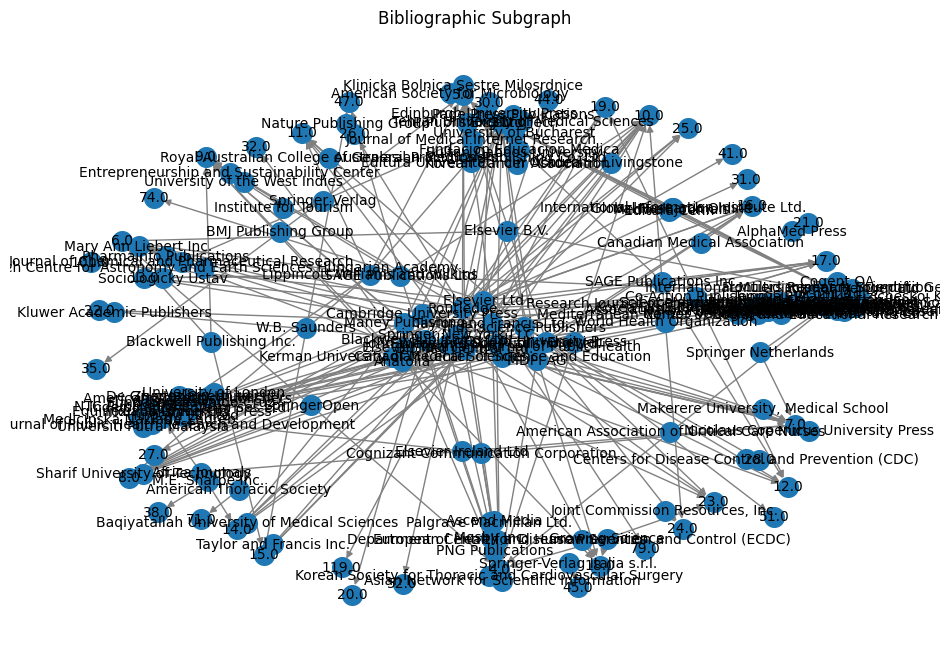

In [19]:
# Add nodes to the graph
for _, row in df_citations.iterrows():
    paper_title = row['Publisher']
    citation = row['Cited by']

    # Add paper title as a node
    graph.add_node(paper_title)

    # Add citation as a node
    graph.add_node(citation)

    # Add edge between paper title and citation
    graph.add_edge(paper_title, citation)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, font_size=10, edge_color='gray')
plt.title('Bibliographic Subgraph')
plt.axis('off')
plt.show()

**Node and edge classification
   Number of topics or papers (similarity in biblographic graph like topic modeling) using clustering(preferable)**

<ipython-input-20-bcdbe3adddf8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


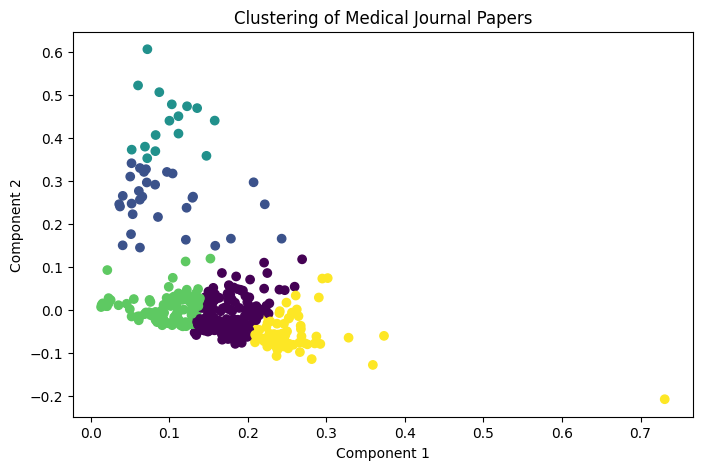

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
# Extract node features (number of topics or papers)
node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
df.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = df['Title'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.title('Clustering of Medical Journal Papers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

<ipython-input-21-ce8b3c434525>:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


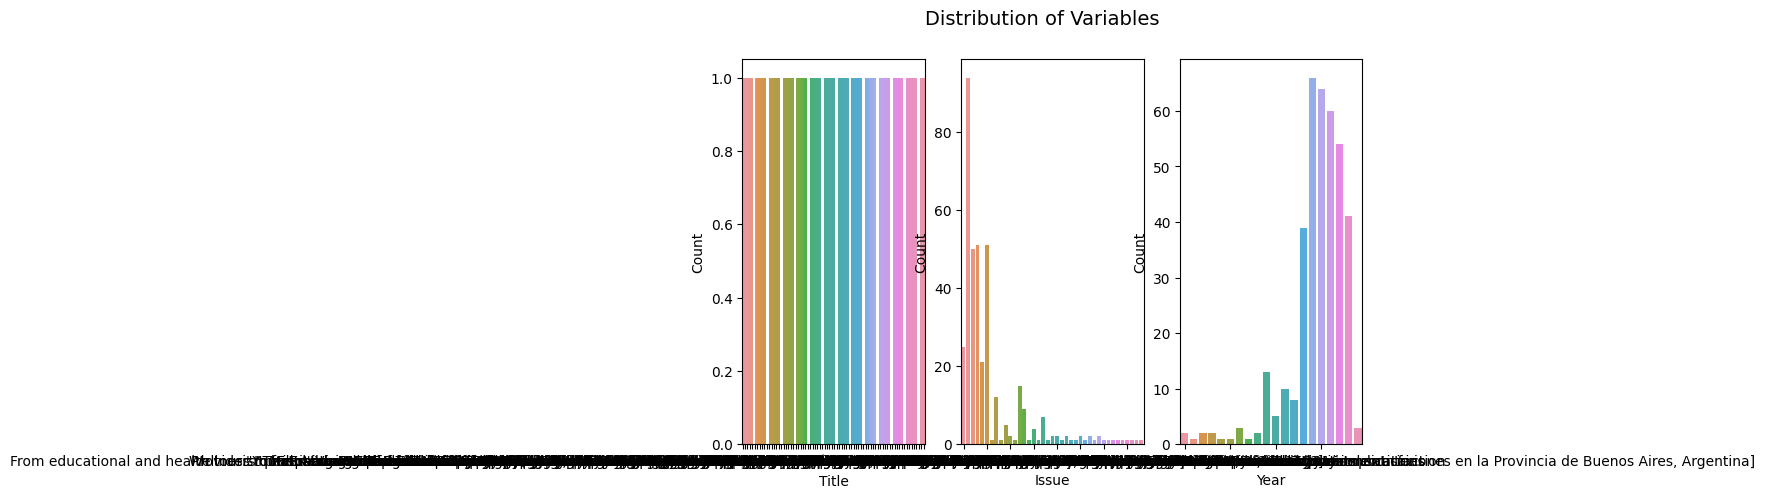

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to evaluate health on
columns_to_evaluate = ['Title', 'Issue', 'Year']

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle('Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()